# Etape1: IMPORTATION DES PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# importation de WARNING
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf


In [2]:
# Charger le fichier Excel
excel_file = 'C:/Users/User/PRO_EN_IA/MINING_DATASET/Mining_Dataset.xlsx'
data = pd.read_excel(excel_file)

# Enregistrer en format CSV
csv_file = 'Mining_Dataset.csv'
data.to_csv(csv_file, index=False)

# Etape2: CHARGEMENT DES DONNEES

In [3]:
data.shape # LE DATASET DISPOSE 5 247 LIGNES ET 7 COLONNES

(5247, 7)

In [4]:
data

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.0,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.0,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.0,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.0,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.0,1.364352,Dur
...,...,...,...,...,...,...,...
5242,5243,Gambela,27.480643,-11.614738,1285.0,1.695698,Dur
5243,5244,Gambela,27.480092,-11.614721,1284.0,3.926087,Dur
5244,5245,Gambela,27.477062,-11.612963,1287.0,1.738089,Dur
5245,5246,Gambela,27.476266,-11.613941,1279.0,11.160760,Dur


In [5]:
#data.head()

# Etape3: ANALYSE DES DONEES

In [6]:
print('Shape of the Data:', data.shape)

Shape of the Data: (5247, 7)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         5247 non-null   int64  
 1   Site       5247 non-null   object 
 2   Longitude  5247 non-null   float64
 3   Latitude   5247 non-null   float64
 4   Altitude   5247 non-null   float64
 5   Ic         5247 non-null   float64
 6   Classe_Ic  5247 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 287.1+ KB


In [8]:
data.columns

Index(['N°', 'Site', 'Longitude', 'Latitude', 'Altitude', 'Ic', 'Classe_Ic'], dtype='object')

In [9]:
# Vérification des Données manquantes
data.isnull().sum()  # PAS DES COLONNES/LIGNES VIDES(pas des données manquantes)

N°           0
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64

In [10]:
# Dropping des certaines colonnes non utiles
data.drop(columns='N°', axis=1, inplace=True)

In [11]:
data

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,Tumbwe,27.398758,-11.479370,1356.0,1.032063,Dur
1,Tumbwe,27.398610,-11.478151,1354.0,27.390744,Dur
2,Tumbwe,27.399395,-11.476759,1354.0,1.541371,Dur
3,Tumbwe,27.399987,-11.475205,1354.0,1.081573,Dur
4,Tumbwe,27.400558,-11.474226,1353.0,1.364352,Dur
...,...,...,...,...,...,...
5242,Gambela,27.480643,-11.614738,1285.0,1.695698,Dur
5243,Gambela,27.480092,-11.614721,1284.0,3.926087,Dur
5244,Gambela,27.477062,-11.612963,1287.0,1.738089,Dur
5245,Gambela,27.476266,-11.613941,1279.0,11.160760,Dur


In [12]:
# Compter le nombre de sites
nombre_sites = data['Site'].nunique()

# Afficher le résultat
print(nombre_sites) # DONC DANS NOTRE DATASET NOUS AVONS 11 SITES

11


In [13]:
data['Site'].unique() # LES NOM DE CES 11 SITES

array(['Tumbwe', 'LUMATA', 'MUTSHATSHA', 'CITE DE LUALABA',
       'QUARTIER MUSUMBA ', 'BUNKEYA', 'BUNGU BUNGU', 'Kasangiri',
       ' DCP Kasangiri', 'KINSEVERE', 'Gambela'], dtype=object)

In [14]:
# Detail des données de la colonne "Site"
data['Site'].value_counts()

Site
Tumbwe               4649
KINSEVERE             431
Kasangiri              27
MUTSHATSHA             20
CITE DE LUALABA        20
BUNGU BUNGU            20
QUARTIER MUSUMBA       19
LUMATA                 18
BUNKEYA                17
 DCP Kasangiri         15
Gambela                11
Name: count, dtype: int64

In [15]:
data['Longitude'].unique()

array([27.39875802, 27.39861045, 27.39939522, ..., 27.47706199,
       27.4762656 , 27.47783445])

In [16]:
data['Longitude'].value_counts()

Longitude
27.392147    3
27.397897    3
27.398579    3
27.399987    3
27.390149    3
            ..
27.385399    1
27.385422    1
27.385446    1
27.385464    1
27.477834    1
Name: count, Length: 4762, dtype: int64

In [17]:
data['Classe_Ic'].unique()

array(['Dur', 'Terne', 'Mi-dur', 'Liquide', 'Mou', 'Pateux'], dtype=object)

In [18]:
data['Latitude'].unique()

array([-11.4793703 , -11.47815133, -11.47675851, ..., -11.6129629 ,
       -11.6139409 , -11.61409204])

In [19]:
data['Latitude'].value_counts()

Latitude
-11.475205    4
-11.479370    3
-11.474226    3
-11.474095    3
-11.470882    3
             ..
-11.470586    1
-11.470548    1
-11.470511    1
-11.470488    1
-11.614092    1
Name: count, Length: 4765, dtype: int64

In [20]:
data['Altitude'].unique()

array([1356.    , 1354.    , 1353.    , ..., 1182.5138, 1283.    ,
       1285.    ])

In [21]:
data['Altitude'].value_counts()

Altitude
1352.334    16
1240.000    16
1353.252     6
1334.000     6
1279.000     5
            ..
1337.070     1
1337.828     1
1336.995     1
1336.957     1
1285.000     1
Name: count, Length: 4265, dtype: int64

In [22]:
data['Ic'].value_counts()

Ic
1.032063    155
0.757955    155
1.048759    155
0.771537    155
2.026590    155
           ... 
1.840000      1
1.510000      1
0.830000      1
0.410000      1
5.506705      1
Name: count, Length: 197, dtype: int64

In [23]:
data['Classe_Ic'].unique()

array(['Dur', 'Terne', 'Mi-dur', 'Liquide', 'Mou', 'Pateux'], dtype=object)

In [24]:
data['Classe_Ic'].value_counts()

Classe_Ic
Dur        4080
Terne       628
Mi-dur      325
Liquide     201
Mou          10
Pateux        3
Name: count, dtype: int64

# Etape4: PRE-TRAITEMENT DES DONNEES

In [25]:
# Dropping passed values
Classe_Dur = data[data['Classe_Ic'] == 'Dur'].iloc[ :625 , :]
Classe_Dur

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,Tumbwe,27.398758,-11.479370,1356.000,1.032063,Dur
1,Tumbwe,27.398610,-11.478151,1354.000,27.390744,Dur
2,Tumbwe,27.399395,-11.476759,1354.000,1.541371,Dur
3,Tumbwe,27.399987,-11.475205,1354.000,1.081573,Dur
4,Tumbwe,27.400558,-11.474226,1353.000,1.364352,Dur
...,...,...,...,...,...,...
808,Tumbwe,27.394227,-11.474065,1348.248,1.048759,Dur
810,Tumbwe,27.394278,-11.474105,1348.453,1.032063,Dur
811,Tumbwe,27.394311,-11.474129,1348.360,27.390744,Dur
812,Tumbwe,27.394341,-11.474153,1348.697,1.541371,Dur


In [26]:
Classe_Terne = data[data['Classe_Ic'] == 'Terne']
Classe_Terne

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
8,Tumbwe,27.395137,-11.473340,1352.000,0.715264,Terne
9,Tumbwe,27.394444,-11.474650,1350.000,0.653490,Terne
11,Tumbwe,27.393726,-11.475818,1344.000,0.559695,Terne
29,Tumbwe,27.388280,-11.471170,1342.000,0.669784,Terne
38,Tumbwe,27.390620,-11.474792,1338.417,0.715264,Terne
...,...,...,...,...,...,...
4685,MUTSHATSHA,24.458400,-10.638600,1240.000,0.663000,Terne
4710,QUARTIER MUSUMBA,27.446298,-11.695117,1204.000,0.720000,Terne
4713,QUARTIER MUSUMBA,27.449804,-11.701423,1214.000,0.510000,Terne
4717,QUARTIER MUSUMBA,27.462209,-11.706052,1205.000,0.710000,Terne


In [27]:
Classe_Mi_Dur = data[data['Classe_Ic'] == 'Mi-dur']
Classe_Mi_Dur

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
15,Tumbwe,27.390718,-11.474095,1341.000,0.757955,Mi-dur
27,Tumbwe,27.385035,-11.469725,1334.000,0.771537,Mi-dur
45,Tumbwe,27.390788,-11.474910,1338.771,0.757955,Mi-dur
57,Tumbwe,27.391128,-11.475153,1338.915,0.771537,Mi-dur
75,Tumbwe,27.391638,-11.475514,1338.924,0.757955,Mi-dur
...,...,...,...,...,...,...
4712,QUARTIER MUSUMBA,27.444450,-11.698303,1222.000,0.960000,Mi-dur
4718,QUARTIER MUSUMBA,27.467567,-11.711234,1202.000,0.770000,Mi-dur
4719,QUARTIER MUSUMBA,27.461638,-11.710222,1206.000,0.950000,Mi-dur
4723,QUARTIER MUSUMBA,27.453713,-11.706925,1196.000,0.950000,Mi-dur


In [28]:
Classe_Liquide = data[data['Classe_Ic'] == 'Liquide']
Classe_Liquide

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
20,Tumbwe,27.389360,-11.471787,1341.0000,-0.794529,Liquide
50,Tumbwe,27.390919,-11.475003,1338.5070,-0.794529,Liquide
80,Tumbwe,27.391808,-11.475637,1339.0120,-0.794529,Liquide
110,Tumbwe,27.392803,-11.476314,1340.4610,-0.794529,Liquide
140,Tumbwe,27.393934,-11.476886,1343.5050,-0.794529,Liquide
...,...,...,...,...,...,...
5193,KINSEVERE,27.500284,-11.583934,1188.6369,-35.219849,Liquide
5203,KINSEVERE,27.499655,-11.583269,1187.8608,-35.219849,Liquide
5213,KINSEVERE,27.500588,-11.582730,1186.8692,-35.219849,Liquide
5223,KINSEVERE,27.501601,-11.581927,1185.9133,-35.219849,Liquide


In [29]:
# POUR CONCATEBER CES DONNEES
data_concat = pd.concat([Classe_Dur, Classe_Terne, Classe_Mi_Dur, Classe_Liquide])
data_concat

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,Tumbwe,27.398758,-11.479370,1356.0000,1.032063,Dur
1,Tumbwe,27.398610,-11.478151,1354.0000,27.390744,Dur
2,Tumbwe,27.399395,-11.476759,1354.0000,1.541371,Dur
3,Tumbwe,27.399987,-11.475205,1354.0000,1.081573,Dur
4,Tumbwe,27.400558,-11.474226,1353.0000,1.364352,Dur
...,...,...,...,...,...,...
5193,KINSEVERE,27.500284,-11.583934,1188.6369,-35.219849,Liquide
5203,KINSEVERE,27.499655,-11.583269,1187.8608,-35.219849,Liquide
5213,KINSEVERE,27.500588,-11.582730,1186.8692,-35.219849,Liquide
5223,KINSEVERE,27.501601,-11.581927,1185.9133,-35.219849,Liquide


In [30]:
data_concat['Classe_Ic'].unique()

array(['Dur', 'Terne', 'Mi-dur', 'Liquide'], dtype=object)

In [31]:
data_concat['Classe_Ic'].value_counts()

Classe_Ic
Terne      628
Dur        625
Mi-dur     325
Liquide    201
Name: count, dtype: int64

In [32]:
Encoder = LabelEncoder()

In [33]:
data_concat['Site'] = Encoder.fit_transform(data_concat['Site'])
data_concat['Classe_Ic'] = Encoder.fit_transform(data_concat['Classe_Ic'])
data_concat

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,6,27.398758,-11.479370,1356.0000,1.032063,0
1,6,27.398610,-11.478151,1354.0000,27.390744,0
2,6,27.399395,-11.476759,1354.0000,1.541371,0
3,6,27.399987,-11.475205,1354.0000,1.081573,0
4,6,27.400558,-11.474226,1353.0000,1.364352,0
...,...,...,...,...,...,...
5193,2,27.500284,-11.583934,1188.6369,-35.219849,1
5203,2,27.499655,-11.583269,1187.8608,-35.219849,1
5213,2,27.500588,-11.582730,1186.8692,-35.219849,1
5223,2,27.501601,-11.581927,1185.9133,-35.219849,1


In [34]:
data_concat['Classe_Ic'].unique()

array([0, 3, 2, 1])

In [35]:
data_concat['Classe_Ic'].value_counts()

Classe_Ic
3    628
0    625
2    325
1    201
Name: count, dtype: int64

In [36]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1779 entries, 0 to 5233
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Site       1779 non-null   int32  
 1   Longitude  1779 non-null   float64
 2   Latitude   1779 non-null   float64
 3   Altitude   1779 non-null   float64
 4   Ic         1779 non-null   float64
 5   Classe_Ic  1779 non-null   int32  
dtypes: float64(4), int32(2)
memory usage: 83.4 KB


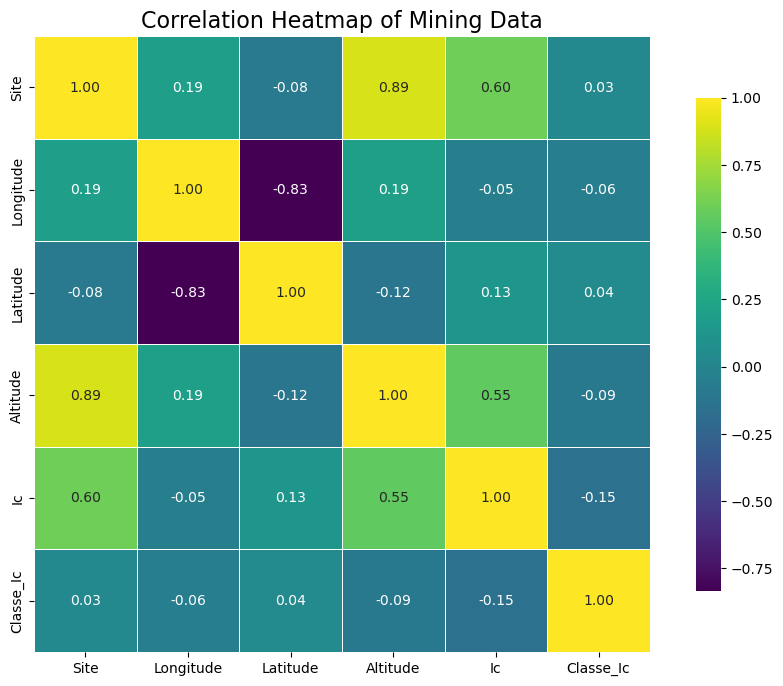

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data_concat.corr(),
    annot=True,
    fmt=".2f",
    cmap='viridis',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8},  
)
plt.title('Correlation Heatmap of Mining Data', fontsize=16)
plt.show()

# Etape5: DIVISION DES DONNEES---Test et Train

In [38]:
X = data_concat.iloc[:,  :-1]
y = data_concat.iloc[: , -1]
y = to_categorical(y, num_classes=4)

In [39]:
#x

In [40]:
#y

In [41]:
scaler = StandardScaler()

X_normal = scaler.fit_transform(X)
# X_test = scaler.transform(X_test)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size = 0.25, random_state=27)

In [43]:
X_train

array([[ 1.88250429e-01,  1.72898448e-02, -2.45076377e-02,
        -3.55838170e-01, -6.02282615e-02],
       [-5.58584463e+00,  5.72945681e-01, -1.33249679e+00,
        -4.95770413e+00, -4.25034459e+00],
       [ 1.88250429e-01,  9.12963295e-02, -7.16160539e-02,
         4.95516967e-01, -6.02282615e-02],
       ...,
       [ 1.88250429e-01,  7.57724702e-02,  3.37014916e-03,
         3.83198603e-01,  8.18885863e-02],
       [ 1.88250429e-01,  2.85026152e-02,  1.05113254e-02,
        -2.65712521e-01, -2.18820498e-01],
       [ 1.88250429e-01,  8.16857794e-02, -5.23739089e-02,
         3.74553766e-01, -6.02282615e-02]])

In [44]:
y_train

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [45]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1334, 5)
y_train shape: (1334, 4)
X_test shape: (445, 5)
y_test shape: (445, 4)


# Etape6: CONSTRUCTION DE Shallow Neural Network avec 5 Algorithmes

# Normalisation des données

In [46]:
# Créer une instance de la classe Sequential 
model_dnn = Sequential()

#model_dnn = tf.keras.models.Sequential()

In [47]:
# AJOUT DE LA 1ère COUCHE
model_dnn.add(Dense(10, input_shape=(5,), activation='relu'))

# AJOUT DE INTERMEDIAIRE 1 (2èmè couche)
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dropout(0.5))

# AJOUT DE LA  (3èm couche intermédiaire)
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.2))

# AJOUT DE LA  (4èm couche intermédiaire)
model_dnn.add(Dense(32, activation='relu'))



# COUCHE DE SORTIE
model_dnn.add(Dense(4, activation='softmax'))

# COMPILATION DE MODEL
model_dnn.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# AFFICHAGE DE L'AQRCHITECTURE DU Rx DE NEURONE
model_dnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,936 (46.62 KB)

 Trainable params: 11,936 (46.62 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = model_dnn.fit(X_train, y_train, epochs=150, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4986 - loss: 1.2449 - val_accuracy: 0.7011 - val_loss: 0.7961
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7487 - loss: 0.6877 - val_accuracy: 0.8517 - val_loss: 0.3542
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8404 - loss: 0.3871 - val_accuracy: 0.9236 - val_loss: 0.3637
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8709 - loss: 0.2791 - val_accuracy: 0.8202 - val_loss: 0.4130
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8256 - loss: 0.3702 - val_accuracy: 0.9618 - val_loss: 0.2161
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8825 - loss: 0.2754 - val_accuracy: 0.9775 - val_loss: 0.1092
Epoch 7/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9087 - loss: 0.2077 - val_accuracy: 0.9820 - val_loss: 0.1280
Epoch 8/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9361 - loss: 0.1648 - val_accuracy: 0.9079 

# Etape7 : VISUALISATION DE L'EVOLUTION DE TRAINING DU Rx NEURONNE

In [49]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

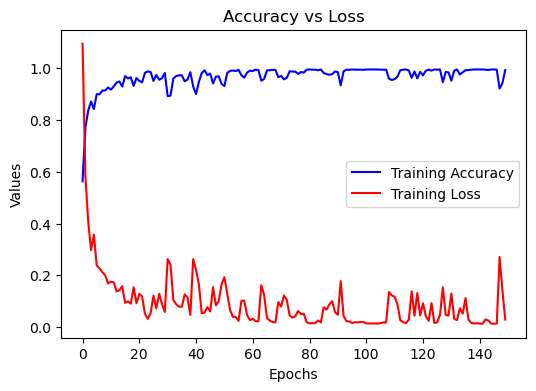

In [50]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

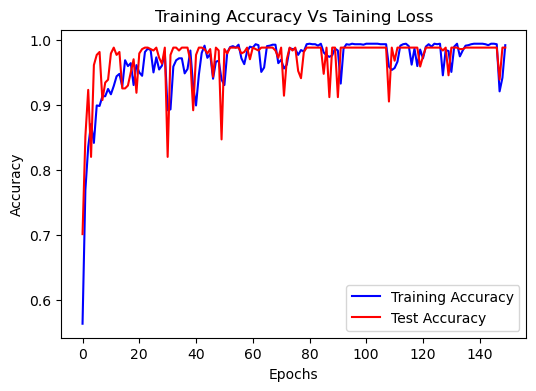

In [51]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

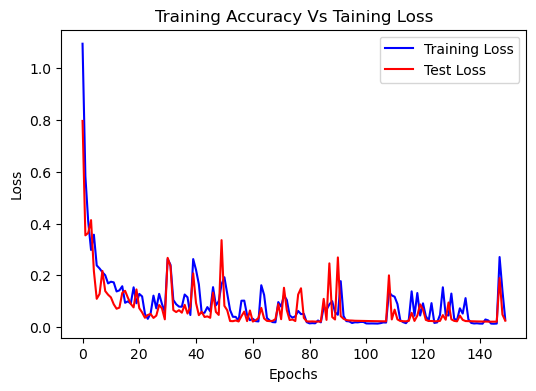

In [52]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

In [53]:
model_dnn.evaluate(X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9871 - loss: 0.0295     


[0.024644507095217705, 0.9887640476226807]

In [54]:
model_dnn.save('model_dnn.h5')

In [55]:
joblib.dump(scaler, "scaler_ic.pkl")

['scaler_ic.pkl']

In [56]:
predictions = model_dnn.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [57]:
predictions

array([[6.8629665e-06, 1.5485105e-07, 9.9400145e-01, 5.9915548e-03],
       [4.8055306e-14, 1.0136078e-14, 1.8211183e-12, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 3.1920886e-37, 1.6043305e-29],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 3.3436826e-31, 2.6341739e-25],
       [7.0230758e-06, 1.5953158e-07, 9.9398601e-01, 6.0068150e-03]],
      dtype=float32)

In [58]:
#predicted_classes
predicted_classes = predictions.argmax(axis=1)

print("Prédictions :", predicted_classes)

Prédictions : [2 3 0 2 3 1 3 3 2 2 0 0 3 2 2 0 3 0 0 3 3 3 0 1 3 0 3 2 0 0 0 0 3 3 1 3 2
 0 2 2 0 2 0 0 0 3 0 2 0 3 3 2 0 3 2 2 2 2 0 3 0 2 2 2 0 1 3 2 2 0 0 3 2 0
 3 0 3 0 2 3 0 0 2 3 0 0 2 3 3 3 0 0 0 2 3 0 1 1 3 2 0 3 3 1 3 1 3 0 3 1 2
 0 3 0 3 3 1 0 3 3 0 0 2 3 0 0 0 3 0 0 3 3 3 0 1 3 3 3 0 0 0 1 0 0 3 0 0 0
 0 1 0 1 2 1 0 3 0 0 0 0 1 0 3 1 0 0 3 3 1 3 0 3 0 0 3 0 0 1 0 3 0 0 3 0 0
 3 3 1 3 3 0 3 3 3 0 2 0 0 0 0 3 3 3 3 3 0 3 2 0 3 3 2 0 0 0 3 3 0 3 2 0 3
 2 0 0 0 2 3 0 1 3 0 1 2 1 3 0 2 0 2 0 3 0 2 0 3 2 2 0 3 0 2 0 0 3 3 0 0 0
 3 2 0 3 3 3 2 2 3 2 3 1 0 0 0 0 1 0 0 0 2 0 2 2 3 2 3 0 1 0 3 2 0 3 0 2 2
 1 0 0 2 0 3 2 2 2 0 0 0 0 1 2 0 2 0 1 3 1 1 2 3 3 0 1 3 0 0 0 0 3 0 0 2 3
 3 0 1 3 3 3 1 0 0 3 2 2 3 1 1 0 2 2 0 3 2 2 2 3 0 0 0 3 3 0 1 3 3 0 2 0 3
 0 3 1 3 0 2 0 3 1 2 0 3 3 0 3 0 3 2 0 0 3 3 0 3 3 1 0 0 2 3 0 0 0 2 1 3 3
 0 2 0 3 0 0 1 3 0 2 3 3 1 0 1 3 3 2 1 0 2 3 1 3 0 1 2 0 3 1 2 1 3 0 0 0 0
 2]


In [59]:
data_concat.head()

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,6,27.398758,-11.479370,1356.0,1.032063,0
1,6,27.398610,-11.478151,1354.0,27.390744,0
2,6,27.399395,-11.476759,1354.0,1.541371,0
3,6,27.399987,-11.475205,1354.0,1.081573,0
4,6,27.400558,-11.474226,1353.0,1.364352,0


In [60]:
# Une simple prediction 

# Donnée d'entrée (5 features)
X_test_2 = np.array([[2,	27.502679,	-11.581215,	1183.3166,	-35.219849	]])
#X_test_2 = np.array([[10, 27.398758, -11.479370, 1356.0, 1.03206]])


# N'oublie pas de scaler aussi cette entrée
X_test_2 = scaler.transform(X_test_2)
print(X_test_2)

# Prédiction
prediction = model_dnn.predict(X_test_2)
predicted_class = prediction.argmax()

print("Classe prédite :", predicted_class)


[[-5.58584463  0.56992661 -1.32603792 -4.99967674 -4.25034463]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Classe prédite : 1


In [61]:
# Affichage des résultats
probs_percent = prediction[0]
#probs_percent = prediction[0] * 100
probs_rounded = np.round(probs_percent, 2)

print(f"Classe prédite : {predicted_class}")
print("Probabilités par classe (%):", probs_rounded)

Classe prédite : 1
Probabilités par classe (%): [0. 1. 0. 0.]
